<a href="https://colab.research.google.com/github/VarhanKusuma/Perbandingan_K-NN_dan_NBC_Pada_Sentimen_Ulasan_Aplikasi_Intermittent_Fasting/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Import library

# Mengimport modul files dari Google Colab untuk mengunggah dan men-download file
from google.colab import files

# Mengimport modul pandas sebagai pd untuk manipulasi data tabular
import pandas as pd

# Mengimport modul io untuk memanipulasi data input dan output
import io

# Mengimport modul nltk untuk pemrosesan bahasa alami
import nltk

# Mengimport korpus stopwords dari modul nltk untuk menghapus kata-kata yang tidak relevan
from nltk.corpus import stopwords

# Tokenisasi kata untuk membagi teks menjadi token kata
from nltk.tokenize import word_tokenize

# Mengimport korpus WordNet dari modul nltk untuk digunakan dalam proses lemmatisasi
from nltk.corpus import wordnet

# Mengimpor kelas WordNetLemmatizer dari modul stem dari nltk untuk melakukan lemmatisasi kata
from nltk.stem import WordNetLemmatizer

# Melakukan operasi pencarian dan manipulasi string menggunakan ekspresi reguler
import re

# Mengimport NumPy, sebuah library yang menyediakan dukungan untuk array dan matriks multidimensi serta berbagai fungsi matematika
import numpy as np

# Mengimport kelas TfidfVectorizer dari modul sklearn.feature_extraction.text untuk mengonversi teks menjadi vektor fitur dengan pembobotan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengimport fungsi train_test_split dari modul sklearn.model_selection untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Mengimport kelas MultinomialNB dari modul sklearn.naive_bayes untuk menerapkan algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Mengimport kelas KNeighborsClassifier dari modul sklearn.neighbors untuk menerapkan algoritma K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Mengimport fungsi accuracy_score dan classification_report dari modul sklearn.metrics untuk mengevaluasi kinerja model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mengimport fungsi classification_report dan confusion_matrix dari modul sklearn.metrics untuk mengevaluasi kinerja model klasifikasi.
from sklearn.metrics import classification_report, confusion_matrix

# Mengimport kelas cross_val_score untuk membagi data menjadi beberapa lipatan (folds), melatih model pada setiap lipatan, dan kemudian menghitung skor kinerja model untuk setiap lipatan.
from sklearn.model_selection import cross_val_score

# Mengimport kelas StratifiedKFold memastikan bahwa setiap lipatan mempertahankan proporsi kelas yang sama seperti yang ada dalam set data asli
from sklearn.model_selection import StratifiedKFold

# Mengimport modul matplotlib.pyplot sebagai plt untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimport modul matplotlib untuk membuat legenda dengan warna yang sesuai
import matplotlib.patches as mpatches

# Mengimport modul seaborn sebagai sns untuk visualisasi data yang lebih menarik
import seaborn as sns

# Mengimport kelas tabulate untuk mencetak tabel dari berbagai jenis data, seperti list, dictionary, atau DataFrame, dengan format yang rapi dan mudah dibaca.
from tabulate import tabulate

# Mengimport kelas WordCloud dari modul wordcloud untuk membuat word cloud dari teks.
from wordcloud import WordCloud

In [2]:
# @title Download Resources

# Berisi model untuk tokenisasi, yang digunakan untuk memisahkan teks menjadi token atau kata-kata individual.
nltk.download('punkt')

# Berisi daftar stopwords bahasa Inggris yang umumnya dihapus dari teks selama tahap pembersihan.
nltk.download('stopwords')

# Sumber daya leksikal bahasa Inggris yang menyimpan hubungan antara kata-kata, seperti sinonim, antonim, dan hubungan semantik lainnya.
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# @title Membaca Dataset CSV & Total Baris Data

dataset = pd.read_csv('Fasting.csv')

# Hitung total baris
total_rows = len(dataset)

print("Total baris dalam file CSV:", total_rows)

Total baris dalam file CSV: 1050


In [4]:
# @title Membersihkan Dataset (Case Folding)

def case_fold(text):
    # Case Folding: Ubah teks menjadi huruf kecil
    return text.lower()

# Melakukan case folding pada kolom 'Comments' dari dataset
dataset['Case Folded Comments'] = dataset['Comments'].apply(case_fold)

# Menampilkan dataset setelah melakukan case folding
dataset[['Comments', 'Case Folded Comments']].head()

,Comments,Case Folded Comments
0,This app keeps track of when yofasting and whe...,this app keeps track of when yofasting and whe...
1,This seems to be far too ridgid for practical ...,this seems to be far too ridgid for practical ...
2,"Love this app overall, but I feel it can use s...","love this app overall, but i feel it can use s..."
3,i really wanted to get fit so i downloaded som...,i really wanted to get fit so i downloaded som...
4,I believe its a good app i will get it on my p...,i believe its a good app i will get it on my p...


In [5]:
# @title Membersihkan Dataset (Filtering)

def filter_text(text):
    # Filtering: Hapus karakter non-alfanumerik dan tanda baca
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Melakukan filtering pada kolom 'Case Folded Comments' dari dataset
dataset['Filtered Comments'] = dataset['Case Folded Comments'].apply(filter_text)

# Menampilkan dataset setelah melakukan filtering
dataset[['Case Folded Comments', 'Filtered Comments']].head()

,Case Folded Comments,Filtered Comments
0,this app keeps track of when yofasting and whe...,this app keeps track of when yofasting and whe...
1,this seems to be far too ridgid for practical ...,this seems to be far too ridgid for practical ...
2,"love this app overall, but i feel it can use s...",love this app overall but i feel it can use so...
3,i really wanted to get fit so i downloaded som...,i really wanted to get fit so i downloaded som...
4,i believe its a good app i will get it on my p...,i believe its a good app i will get it on my p...


In [6]:
# @title Membersihkan Dataset (Tokenisasi)

def tokenize_text(text):
    # Tokenisasi: Memisahkan teks menjadi kata-kata individual
    return word_tokenize(text)

# Melakukan tokenisasi pada kolom 'Comments' dari dataset
dataset['Tokenized Comments'] = dataset['Filtered Comments'].apply(tokenize_text)

# Menampilkan dataset setelah melakukan tokenisasi
dataset[['Filtered Comments', 'Tokenized Comments']].head()

,Filtered Comments,Tokenized Comments
0,this app keeps track of when yofasting and whe...,"[this, app, keeps, track, of, when, yofasting,..."
1,this seems to be far too ridgid for practical ...,"[this, seems, to, be, far, too, ridgid, for, p..."
2,love this app overall but i feel it can use so...,"[love, this, app, overall, but, i, feel, it, c..."
3,i really wanted to get fit so i downloaded som...,"[i, really, wanted, to, get, fit, so, i, downl..."
4,i believe its a good app i will get it on my p...,"[i, believe, its, a, good, app, i, will, get, ..."


In [7]:
# @title Membersihkan Dataset (Stopwords Removal)

def remove_stopwords(tokens):
    # Hapus stopwords bahasa Inggris
    stop_words = set(stopwords.words('english'))
    # Menambahkan kata-kata tambahan secara manual
    additional_stopwords = {'app', 'fast', 'time', 'use', 'would', 'im', 'get', 'start', 'day', 'one', 'way', 'need', 'open', 'hour', 'edit', 'got',
                            'ive', 'also', 'using', 'many', 'version', 'water', 'much', 'times', 'fasting', 'every', 'give', 'option', 'week', 'youre',
                            'see', 'end', 'days', 'eating', 'set', 'back', 'could', 'apps', 'still', 'far', 'go', 'used', 'find', 'phone', 'timer',
                            'body', 'long', 'notifications', 'going', 'started', 'make', 'add', 'plans', 'first', 'another', 'stars', 'work', 'eat',
                            'hours', 'data', 'without', 'try', 'tracking', 'custom', 'longer', 'lost', 'drink', 'months', 'tried', 'little', 'food',
                            'theres', 'month', 'however', 'intermittent', 'know', 'tracker', 'getting', 'since', 'think', 'makes', 'manually',
                            'google', 'seems', 'thing', 'fasts', 'something', 'feel', 'lot', 'year', 'allow', 'wanted', 'always', 'meal', 'instead'}

    # Gabungkan daftar stopwords dengan kata-kata tambahan
    stop_words.update(additional_stopwords)
    return [word for word in tokens if word not in stop_words]

# Melakukan penghapusan stop words pada kolom 'Tokenized Comments' dari dataset
dataset['Comments(Without Stopwords)'] = dataset['Tokenized Comments'].apply(remove_stopwords)

# Menampilkan dataset setelah menghapus stop words
dataset[['Tokenized Comments', 'Comments(Without Stopwords)']].head()

,Tokenized Comments,Comments(Without Stopwords)
0,"[this, app, keeps, track, of, when, yofasting,...","[keeps, track, yofasting, tips, tells, symtoms..."
1,"[this, seems, to, be, far, too, ridgid, for, p...","[ridgid, practical, pm, today, didnt, computer..."
2,"[love, this, app, overall, but, i, feel, it, c...","[love, overall, improvments, like, account, sy..."
3,"[i, really, wanted, to, get, fit, so, i, downl...","[really, fit, downloaded, forgot, rememberd, a..."
4,"[i, believe, its, a, good, app, i, will, get, ...","[believe, good, giving, star, bc, trust, revs,..."


In [8]:
# @title Membersihkan Dataset (Lemmatization)

def apply_lemmatization(tokens):
    # Menerapkan lemmatisasi menggunakan WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Melakukan lemmatisasi pada kolom 'Comments(Without Stopwords)' dari dataset
dataset['Lemmatized Comments'] = dataset['Comments(Without Stopwords)'].apply(apply_lemmatization)

# Menampilkan dataset setelah lemmatisasi
dataset[['Comments(Without Stopwords)', 'Lemmatized Comments']].head()

,Comments(Without Stopwords),Lemmatized Comments
0,"[keeps, track, yofasting, tips, tells, symtoms...","[keep, track, yofasting, tip, tell, symtoms, s..."
1,"[ridgid, practical, pm, today, didnt, computer...","[ridgid, practical, pm, today, didnt, computer..."
2,"[love, overall, improvments, like, account, sy...","[love, overall, improvments, like, account, sy..."
3,"[really, fit, downloaded, forgot, rememberd, a...","[really, fit, downloaded, forgot, rememberd, a..."
4,"[believe, good, giving, star, bc, trust, revs,...","[believe, good, giving, star, bc, trust, rev, ..."


In [9]:
# @title Hasil dari Dataset Yang Sudah Dibersihkan (Cleaning)

def clean_text(text):

    # Case Folding: Ubah teks menjadi huruf kecil
    text = text.lower()

    # Filtering: Hapus karakter non-alfabet dan tanda baca, serta angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenisasi: Memisahkan teks menjadi kata-kata individual
    tokens = word_tokenize(text)

    # Stopwords Removal: Hapus stopwords bahasa Inggris
    stop_words = set(stopwords.words('english'))
    # Menambahkan kata-kata tambahan secara manual
    additional_stopwords = {'app', 'fast', 'time', 'use', 'would', 'im', 'get', 'start', 'day', 'one', 'way', 'need', 'open', 'hour', 'edit', 'got',
                            'ive', 'also', 'using', 'many', 'version', 'water', 'much', 'times', 'fasting', 'every', 'give', 'option', 'week', 'youre',
                            'see', 'end', 'days', 'eating', 'set', 'back', 'could', 'apps', 'still', 'far', 'go', 'used', 'find', 'phone', 'timer',
                            'body', 'long', 'notifications', 'going', 'started', 'make', 'add', 'plans', 'first', 'another', 'stars', 'work', 'eat',
                            'hours', 'data', 'without', 'try', 'tracking', 'custom', 'longer', 'lost', 'drink', 'months', 'tried', 'little', 'food',
                            'theres', 'month', 'however', 'intermittent', 'know', 'tracker', 'getting', 'since', 'think', 'makes', 'manually',
                            'google', 'seems', 'thing', 'fasts', 'something', 'feel', 'lot', 'year', 'allow', 'wanted', 'always', 'meal', 'instead'}

    # Gabungkan daftar stopwords dengan kata-kata tambahan
    stop_words.update(additional_stopwords)
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization: Mengubah kata-kata ke bentuk dasarnya
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]

    # Hapus redundansi kata-kata yang sama
    tokens = list(set(tokens))

    # Gabungkan token kembali menjadi teks
    clean_text = ' '.join(tokens)

    return clean_text

# Melakukan pembersihan teks pada kolom 'Comments' dari dataset
dataset['Comments(Cleaning)'] = dataset['Comments'].apply(clean_text)

# Menampilkan dataset 'Comments' asli dan yang sudah dibersihkan
dataset[['Comments', 'Comments(Cleaning)']].head()

,Comments,Comments(Cleaning)
0,This app keeps track of when yofasting and whe...,withhold track progress future tip amaze hope ...
1,This seems to be far too ridgid for practical ...,actual actually tool realististic computer don...
2,"Love this app overall, but I feel it can use s...",track improvments like devices status sync acr...
3,i really wanted to get fit so i downloaded som...,suposed dosent rememberd eat forget put stop f...
4,I believe its a good app i will get it on my p...,rlly tmmrw bc good healthy hope believe kinda ...


In [10]:
# @title Menambah Kolom Sentiment dari Hasil Rating

def label_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

# Membuat kolom baru 'Sentiment' yang berisi label sentimen berdasarkan nilai rating
dataset['Sentiment'] = dataset['Rating'].apply(label_sentiment)

# Menggunakan daftar indeks spesifik untuk memilih baris
indices = [50, 190, 750, 343, 11]
subset_indices = dataset[['Comments', 'Rating', 'Sentiment']].iloc[indices]

# Mengatur ulang indeks dan menghapus kolom indeks yang lama
subset_indices_reset = subset_indices.reset_index(drop=True)

# Menampilkan hasil menggunakan display
display(subset_indices_reset)

,Comments,Rating,Sentiment
0,Too many ads. Makes you sit through a 1 min ad...,1,negative
1,"Ads are excessive, and things it advertises, l...",2,negative
2,"Nice and simple, but from time to time it stop...",3,neutral
3,This app helps me stay on track for my eating ...,4,positive
4,This app is great. Now I can learn how to eat ...,5,positive


In [11]:
# @title  Term Frequency-Inverse Document Frequency (TF-IDF)

# Mengambil jumlah elemen dalam kolom 'Comments(Cleaning)'
num_comments = len(dataset['Comments(Cleaning)'])
print(f"Jumlah Baris Komentar: {num_comments}")

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menerapkan TF-IDF Vectorizer pada data komentar yang sudah bersih
X_tfidf = tfidf_vectorizer.fit_transform(dataset['Comments(Cleaning)'])

# Mendapatkan daftar fitur dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah sparse matrix menjadi dense matrix dan transpose
tfidf_dense = X_tfidf.todense().T

# Buat DataFrame dengan skema yang diinginkan
tfidf_df = pd.DataFrame(tfidf_dense, index=feature_names, columns=[f'D{i+1}' for i in range(num_comments)])

Jumlah Baris Komentar: 1050


In [12]:
# @title Tabel Sampel Hasil Pembobotan TF-IDF

# Fungsi untuk mengurutkan nilai dalam setiap kolom dari besar ke kecil
sorted_tfidf_df = tfidf_df.apply(lambda x: x.sort_values(ascending=False).values)

# Kata teratas dari setiap kolom
top_words = sorted_tfidf_df.iloc[:, :5]

# Tampilkan lima baris pertama dari DataFrame yang diurutkan
print("Tabel untuk Sampel Hasil Pembobotan dengan TF-IDF :")
print(tabulate(top_words.head(15), headers='keys', tablefmt='pretty'))

Tabel untuk Sampel Hasil Pembobotan dengan TF-IDF :
+------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|            |         D1          |         D2          |         D3          |         D4          |         D5          |
+------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|  ability   | 0.3753753237132134  | 0.3047279145116753  | 0.42954588782416314 | 0.3598713863952852  | 0.3519990194411813  |
|  abismal   | 0.3753753237132134  | 0.3047279145116753  | 0.4055704646574502  | 0.3598713863952852  | 0.3519990194411813  |
|    abit    | 0.3186060418518017  | 0.3047279145116753  | 0.4055704646574502  | 0.3598713863952852  | 0.3519990194411813  |
|    able    | 0.2647903425595101  | 0.2877192993480305  | 0.31886497255384505 | 0.3397848973402426  | 0.3075995300590938  |
| abnoxious  | 0.25904291055377326 | 0.27565149483917295 | 0.303002343512

In [13]:
# @title Data Latih dan Data Uji dengan Perbandingan 80:20

# Bagi data menjadi data latih dan data uji untuk TF-IDF Vectorizer
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, dataset['Sentiment'], test_size=0.2, random_state=42)

In [14]:
# @title K-Nearest Neighbors (KNN) TfidfVectorizer

# Inisialisasi model K-Nearest Neighbors (KNN) dengan jumlah tetangga (k) = 5
tfidf_classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN menggunakan data latih untuk TF-IDF Vectorizer
tfidf_classifier.fit(X_tfidf_train, y_train)

# Melakukan prediksi menggunakan data uji
y_tfidf_knn = tfidf_classifier.predict(X_tfidf_test)

# Menghitung matriks (confusion matrix)
cm = confusion_matrix(y_test, y_tfidf_knn)


Evaluation for TF-IDF Vectorizer:
              precision    recall  f1-score   support

    negative       0.55      0.83      0.66        76
     neutral       0.51      0.32      0.40        68
    positive       0.75      0.59      0.66        66

    accuracy                           0.59       210
   macro avg       0.60      0.58      0.57       210
weighted avg       0.60      0.59      0.57       210

Accuracy: 59%


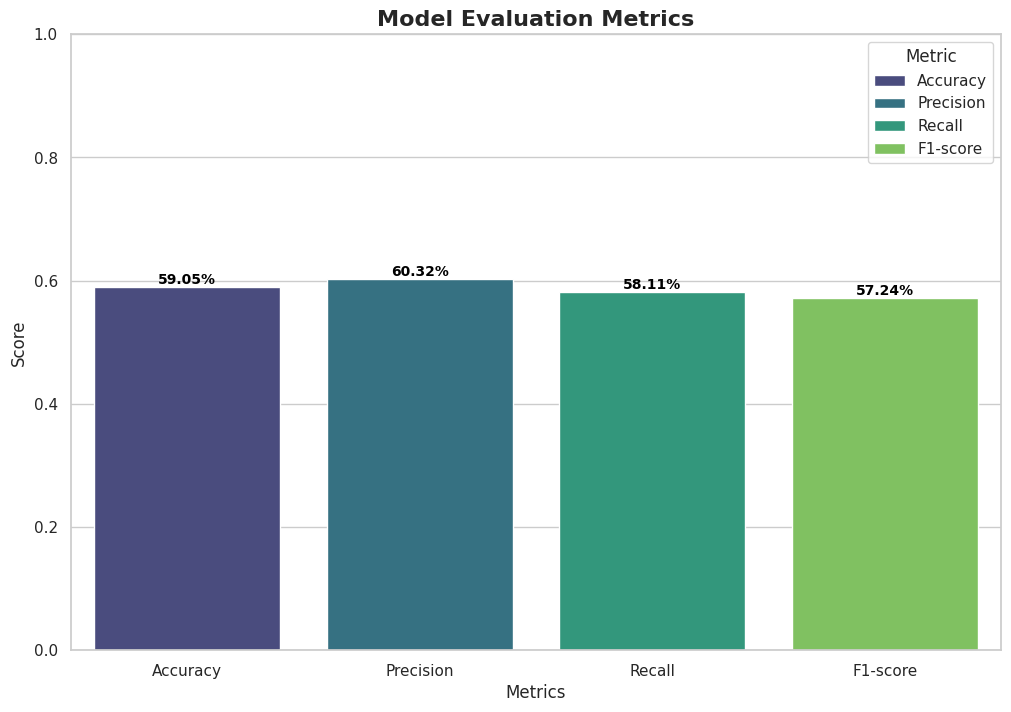

In [15]:
# @title Model Evaluation Metrics K-Nearest Neighbors (KNN)

# Menghitung akurasi model
accuracy_knn = accuracy_score(y_test, y_tfidf_knn)
# Konversi ke persentase
rounded_accuracy_knn = round(accuracy_knn * 100)
# Menghitung presisi model dengan menangani zero division
precision_knn = precision_score(y_test, y_tfidf_knn, average='macro', zero_division=0)
# Menghitung recall model dengan menangani zero division
recall_knn = recall_score(y_test, y_tfidf_knn, average='macro', zero_division=0)
# Menghitung F1-score model
f1_knn = f1_score(y_test, y_tfidf_knn, average='macro', zero_division=0)

# Evaluasi model untuk TF-IDF Vectorizer
print("\nEvaluation for TF-IDF Vectorizer:")
print(classification_report(y_test, y_tfidf_knn))

# Menampilkan persentase akurasi
print(f"Accuracy: {rounded_accuracy_knn}%")

# Data metrik dan nilai
metrics_knn = ["Accuracy", "Precision", "Recall", "F1-score"]
values_knn = [accuracy_knn, precision_knn, recall_knn, f1_knn]  # Nilai dalam skala 0-1

# Membuat DataFrame long-form
data_knn = pd.DataFrame({
    'Metric': metrics_knn,
    'Value': values_knn,
    'Model': ['KNN'] * len(metrics_knn)
})

# Set tema
sns.set_theme(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='Metric', palette='viridis', data=data_knn, legend=True)
plt.title("Model Evaluation Metrics", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.ylim(0, 1)  # Memastikan sumbu y berada dalam rentang 0-1

# Menambahkan nilai numerik di atas setiap bar
for index, row in data_knn.iterrows():
    plt.text(row.name, row['Value'], f'{row["Value"]*100:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()

Accuracy (Confusion Matrix): 59.05%


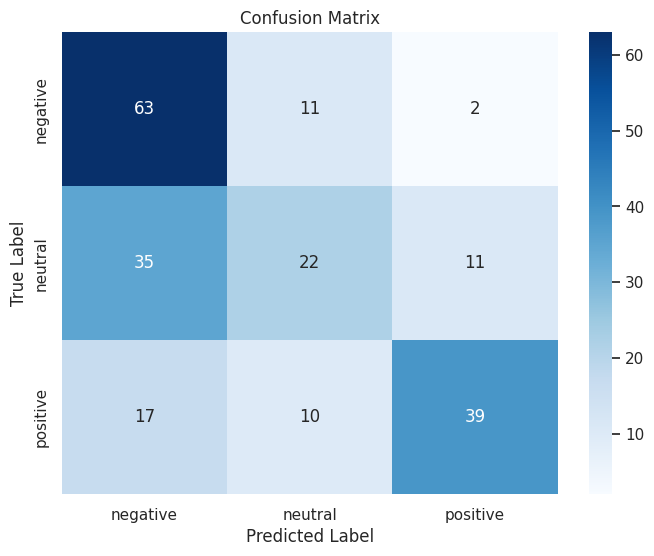

In [16]:
# @title Model Confusion Matrix K-Nearest Neighbors (KNN)

# Menghitung akurasi dari confusion matrix
total_samples = np.sum(cm)
correct_predictions = np.trace(cm)
accuracy_from_cm = correct_predictions / total_samples

# Menghitung akurasi dari confusion matrix dalam persentase
accuracy_from_cm_percent = accuracy_from_cm * 100

# Menampilkan akurasi dari confusion matrix
print(f"Accuracy (Confusion Matrix): {accuracy_from_cm_percent:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=tfidf_classifier.classes_, yticklabels=tfidf_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# @title Model Naive Bayes Multinomial (NBC) TfidfVectorizer

# Inisialisasi model Naive Bayes Multinomial untuk TF-IDF Vectorizer
tfidf_classifier = MultinomialNB()

# Melatih model menggunakan data latih untuk TF-IDF Vectorizer
tfidf_classifier.fit(X_tfidf_train, y_train)

# Lakukan prediksi menggunakan data uji untuk TF-IDF Vectorizer
y_tfidf_nbc = tfidf_classifier.predict(X_tfidf_test)

# Menghitung matriks (confusion matrix)
cm = confusion_matrix(y_test, y_tfidf_nbc)


Evaluation for TF-IDF Vectorizer:
              precision    recall  f1-score   support

    negative       0.79      0.74      0.76        76
     neutral       0.59      0.51      0.55        68
    positive       0.71      0.86      0.78        66

    accuracy                           0.70       210
   macro avg       0.70      0.71      0.70       210
weighted avg       0.70      0.70      0.70       210

Accuracy: 70%


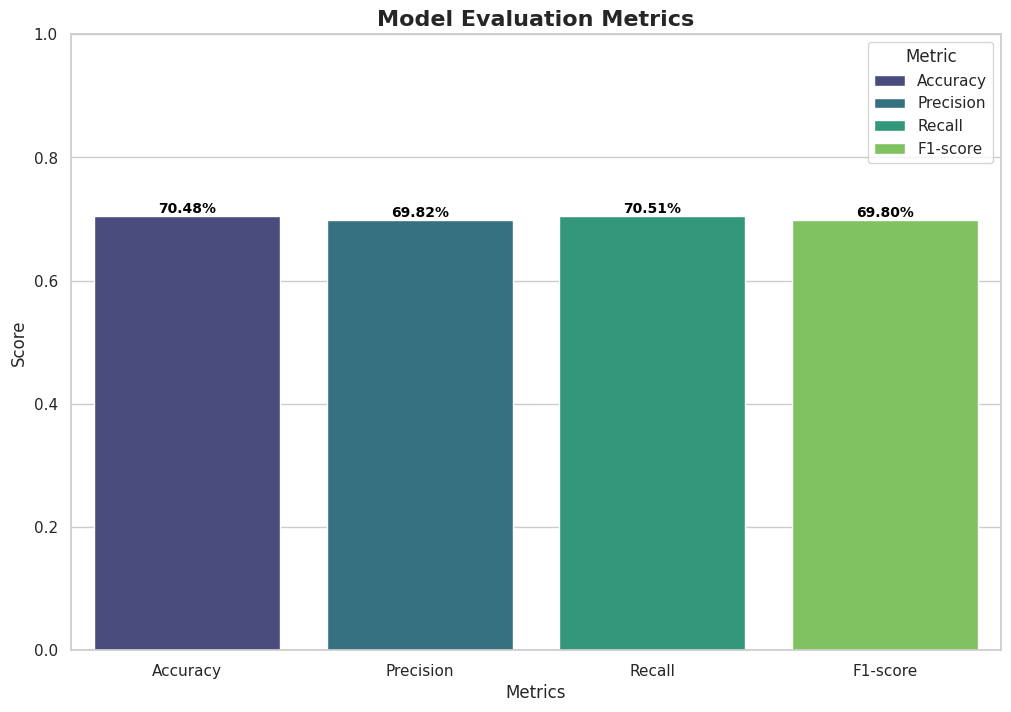

In [18]:
# @title Model Evaluation Metrics Naive Bayes Multinomial (NBC)

# Menghitung akurasi model
accuracy_nbc = accuracy_score(y_test, y_tfidf_nbc)
# Konversi ke persentase
rounded_accuracy_nbc = round(accuracy_nbc * 100)
# Menghitung presisi model dengan menangani zero division
precision_nbc = precision_score(y_test, y_tfidf_nbc, average='macro', zero_division=0)
# Menghitung recall model dengan menangani zero division
recall_nbc = recall_score(y_test, y_tfidf_nbc, average='macro', zero_division=0)
# Menghitung F1-score model
f1_nbc = f1_score(y_test, y_tfidf_nbc, average='macro')

# Evaluasi model untuk TF-IDF Vectorizer
print("\nEvaluation for TF-IDF Vectorizer:")
print(classification_report(y_test, y_tfidf_nbc))

# Menampilkan persentase akurasi
print(f"Accuracy: {rounded_accuracy_nbc}%")

# Data metrik dan nilai
metrics_nbc = ["Accuracy", "Precision", "Recall", "F1-score"]
values_nbc = [accuracy_nbc, precision_nbc, recall_nbc, f1_nbc]  # Nilai dalam skala 0-1

# Membuat DataFrame long-form
data_nbc = pd.DataFrame({
    'Metric': metrics_nbc,
    'Value': values_nbc,
    'Model': ['NBC'] * len(metrics_nbc)
})

# Set tema
sns.set_theme(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='Metric', palette='viridis', data=data_nbc, legend=True)
plt.title("Model Evaluation Metrics", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.ylim(0, 1)  # Memastikan sumbu y berada dalam rentang 0-1

# Menambahkan nilai numerik di atas setiap bar
for index, row in data_nbc.iterrows():
    plt.text(row.name, row['Value'], f'{row["Value"]*100:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()

Accuracy (Confusion Matrix): 70.48%


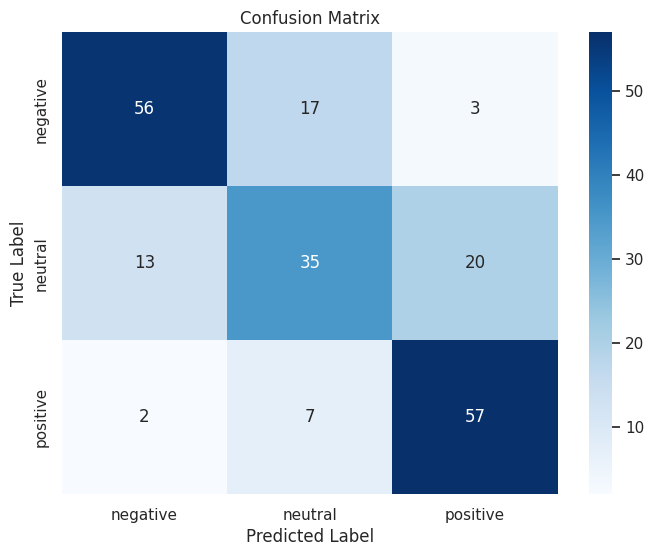

In [19]:
# @title Model Confusion Matrix  Naive Bayes Multinomial (NBC)

# Menghitung akurasi dari confusion matrix
total_samples = np.sum(cm)
correct_predictions = np.trace(cm)
accuracy_from_cm = correct_predictions / total_samples

# Menghitung akurasi dari confusion matrix dalam persentase
accuracy_from_cm_percent = accuracy_from_cm * 100

# Menampilkan akurasi dari confusion matrix
print(f"Accuracy (Confusion Matrix): {accuracy_from_cm_percent:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=tfidf_classifier.classes_, yticklabels=tfidf_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

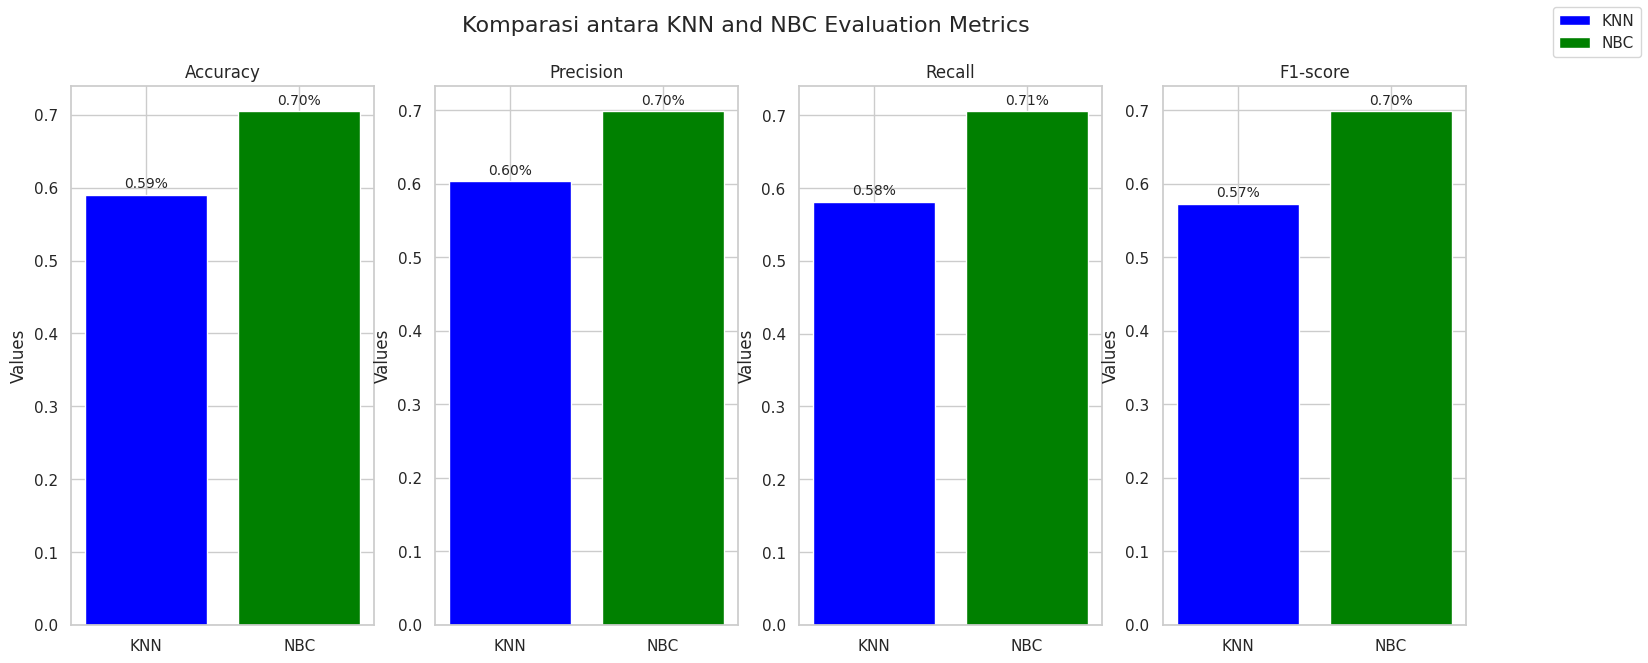

In [20]:
# @title Komparasi antara KNN and NBC Evaluation Metrics

# Jumlah subplot yang akan dibuat
num_metrics = len(metrics_knn)

# Plotting
fig, axs = plt.subplots(1, num_metrics, figsize=(18, 7))  # Buat subplot

# Loop melalui setiap metrik untuk membuat subplot
for i in range(num_metrics):
    # Plot untuk KNN
    axs[i].bar('KNN', values_knn[i], color='blue', label='KNN')
    # Plot untuk NBC
    axs[i].bar('NBC', values_nbc[i], color='green', label='NBC')

    # Atur judul subplot
    axs[i].set_title(metrics_knn[i])

    # Atur label di sumbu y
    axs[i].set_ylabel('Values')

    # Nilai numerik dengan % di atas setiap bar
    for bar in axs[i].patches:
        height = bar.get_height()
        axs[i].annotate(f'{height:.2f}%',
                        (bar.get_x() + bar.get_width() / 2, height),
                        ha='center', va='center', size=10, xytext=(0, 8),
                        textcoords='offset points')

# Tampilkan legenda
fig.legend(['KNN', 'NBC'], loc='upper right')

# Tampilkan plot
plt.suptitle('Komparasi antara KNN and NBC Evaluation Metrics', fontsize=16)
plt.show()

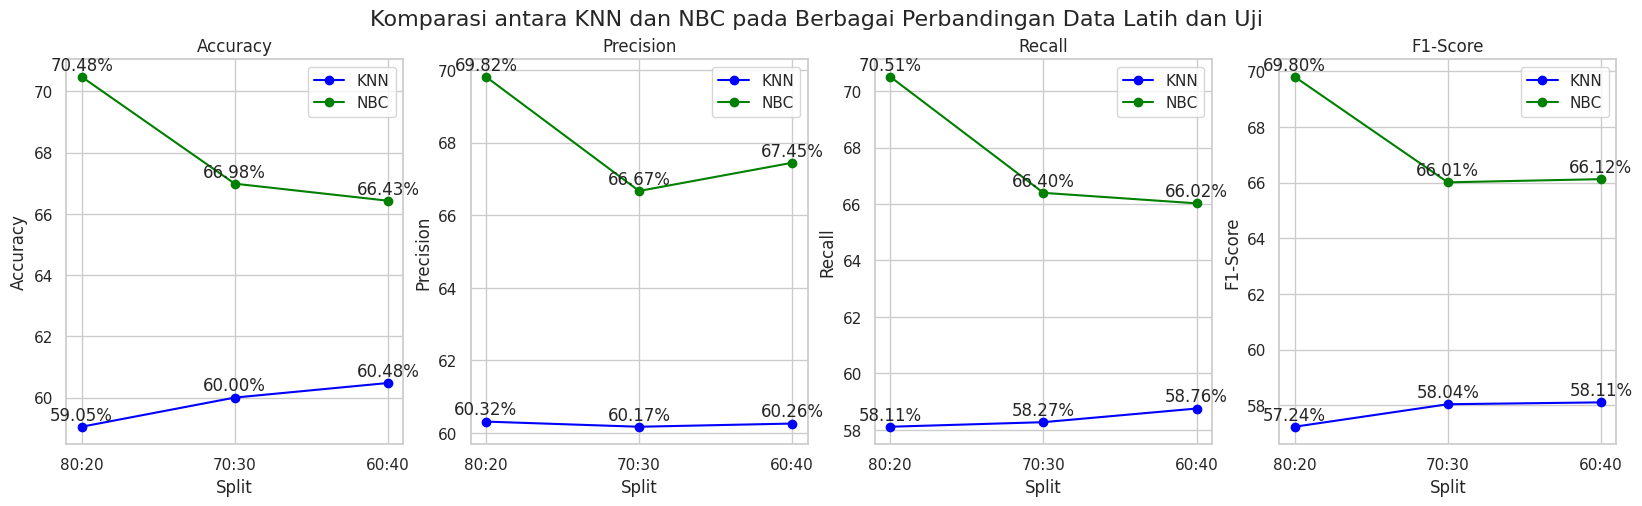

In [21]:
# @title Komparasi antara KNN dan NBC pada Berbagai Perbandingan Data Latih dan Uji (80,70,60)
# Fungsi untuk melatih dan mengevaluasi model
def evaluate_models(X_train, X_test, y_train, y_test):
    metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    metrics['Model'].append('KNN')
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred_knn) * 100)
    metrics['Precision'].append(precision_score(y_test, y_pred_knn, average='macro') * 100)
    metrics['Recall'].append(recall_score(y_test, y_pred_knn, average='macro') * 100)
    metrics['F1-Score'].append(f1_score(y_test, y_pred_knn, average='macro') * 100)

    # NBC
    nbc = MultinomialNB()
    nbc.fit(X_train, y_train)
    y_pred_nbc = nbc.predict(X_test)

    metrics['Model'].append('NBC')
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred_nbc) * 100)
    metrics['Precision'].append(precision_score(y_test, y_pred_nbc, average='macro') * 100)
    metrics['Recall'].append(recall_score(y_test, y_pred_nbc, average='macro') * 100)
    metrics['F1-Score'].append(f1_score(y_test, y_pred_nbc, average='macro') * 100)

    return metrics

# Bagi data menjadi 3 perbandingan: 80:20, 70:30, 60:40
splits = {'80:20': 0.2, '70:30': 0.3, '60:40': 0.4}
all_metrics = []

for key, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, dataset['Sentiment'], test_size=test_size, random_state=42)
    metrics = evaluate_models(X_train, X_test, y_train, y_test)
    metrics_df = pd.DataFrame(metrics)
    metrics_df['Split'] = key
    all_metrics.append(metrics_df)

# Gabungkan semua hasil menjadi satu DataFrame
result_df = pd.concat(all_metrics, ignore_index=True)

# Plotting komparasi
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = {'KNN': 'blue', 'NBC': 'green'}

for i, metric in enumerate(metrics_names):
    for model in result_df['Model'].unique():
        data = result_df[result_df['Model'] == model]
        axs[i].plot(data['Split'], data[metric], marker='o', label=model, color=colors[model])

        # Tambahkan angka % di atas setiap titik
        for j, txt in enumerate(data[metric]):
            axs[i].annotate(f'{txt:.2f}%', (data['Split'].iloc[j], data[metric].iloc[j]), textcoords="offset points", xytext=(0, 5), ha='center')

    axs[i].set_title(metric)
    axs[i].set_xlabel('Split')
    axs[i].set_ylabel(metric)
    axs[i].legend()

plt.suptitle('Komparasi antara KNN dan NBC pada Berbagai Perbandingan Data Latih dan Uji', fontsize=16)
plt.show()

In [22]:
# @title Model K-Fold Cross Validation 10-Fold K-NN & NBC

# Definisikan fungsi untuk melakukan K-Fold Cross Validation
def perform_kfold_cv(X, y, classifier, n_splits=10):
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_results = cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy')
    for i, acc in enumerate(cv_results):
        print(f"Fold {i+1} accuracy: {acc:.4f}")
    return cv_results.mean() * 100, cv_results.std() * 200

# Inisialisasi model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = MultinomialNB()

# List untuk menyimpan hasil
ratios = [0.8, 0.7, 0.6]
knn_means, knn_stds = [], []
nb_means, nb_stds = [], []

# Perbandingan training:test yang diinginkan
splits = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, dataset['Sentiment'], test_size=ratio[1], train_size=ratio[0], random_state=42)

    # Perform K-Fold CV for KNN
    print(f"\nKNN Cross Validation Results ({int(ratio[0]*100)}:{int(ratio[1]*100)}):")
    knn_mean, knn_std = perform_kfold_cv(X_train, y_train, knn_classifier)
    knn_means.append(knn_mean)
    knn_stds.append(knn_std)

    # Perform K-Fold CV for NBC
    print(f"\nNBC Cross Validation Results ({int(ratio[0]*100)}:{int(ratio[1]*100)}):")
    nb_mean, nb_std = perform_kfold_cv(X_train, y_train, nb_classifier)
    nb_means.append(nb_mean)
    nb_stds.append(nb_std)

# Buat DataFrame hasil
results = {
    'Split': ['80:20', '70:30', '60:40'],
    'KNN_Mean': knn_means,
    'KNN_Std': knn_stds,
    'NBC_Mean': nb_means,
    'NBC_Std': nb_stds
}
result_df = pd.DataFrame(results)


KNN Cross Validation Results (80:20):
Fold 1 accuracy: 0.5714
Fold 2 accuracy: 0.6548
Fold 3 accuracy: 0.5595
Fold 4 accuracy: 0.5595
Fold 5 accuracy: 0.6429
Fold 6 accuracy: 0.5714
Fold 7 accuracy: 0.5357
Fold 8 accuracy: 0.6071
Fold 9 accuracy: 0.5595
Fold 10 accuracy: 0.6786

NBC Cross Validation Results (80:20):
Fold 1 accuracy: 0.7381
Fold 2 accuracy: 0.6548
Fold 3 accuracy: 0.7857
Fold 4 accuracy: 0.7381
Fold 5 accuracy: 0.6786
Fold 6 accuracy: 0.7143
Fold 7 accuracy: 0.6667
Fold 8 accuracy: 0.6548
Fold 9 accuracy: 0.6429
Fold 10 accuracy: 0.7738

KNN Cross Validation Results (70:30):
Fold 1 accuracy: 0.6216
Fold 2 accuracy: 0.5811
Fold 3 accuracy: 0.5676
Fold 4 accuracy: 0.5676
Fold 5 accuracy: 0.6351
Fold 6 accuracy: 0.6164
Fold 7 accuracy: 0.5342
Fold 8 accuracy: 0.6027
Fold 9 accuracy: 0.5342
Fold 10 accuracy: 0.5342

NBC Cross Validation Results (70:30):
Fold 1 accuracy: 0.7568
Fold 2 accuracy: 0.6757
Fold 3 accuracy: 0.6486
Fold 4 accuracy: 0.7432
Fold 5 accuracy: 0.7703
F

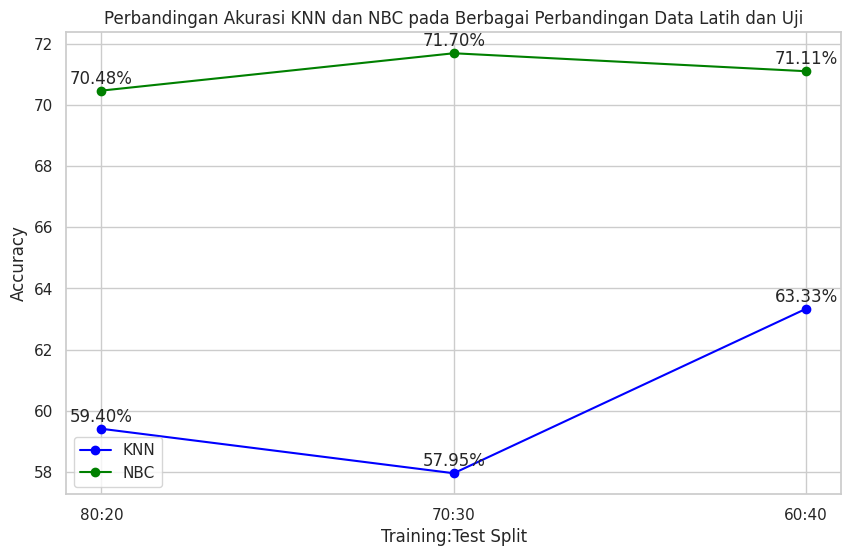

In [23]:
# @title  Perbandingan Accuracy Model K-Fold Cross Validation

# Plot hasil
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'KNN': 'blue', 'NBC': 'green'}

for model in ['KNN', 'NBC']:
    means = result_df[f'{model}_Mean']
    stds = result_df[f'{model}_Std']
    ax.plot(result_df['Split'], means, marker='o', label=model, color=colors[model])

    # Tambahkan angka % di atas setiap titik
    for i, txt in enumerate(means):
        ax.annotate(f'{txt:.2f}%', (result_df['Split'].iloc[i], means.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

ax.set_title('Perbandingan Akurasi KNN dan NBC pada Berbagai Perbandingan Data Latih dan Uji')
ax.set_xlabel('Training:Test Split')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)

plt.show()

In [24]:
# @title Word Cloud

# memisahkan dataset berdasarkan sentimen
positive_comments = dataset.loc[dataset['Sentiment'] == 'positive', 'Comments(Cleaning)'].str.cat(sep=' ')
neutral_comments = dataset.loc[dataset['Sentiment'] == 'neutral', 'Comments(Cleaning)'].str.cat(sep=' ')
negative_comments = dataset.loc[dataset['Sentiment'] == 'negative', 'Comments(Cleaning)'].str.cat(sep=' ')

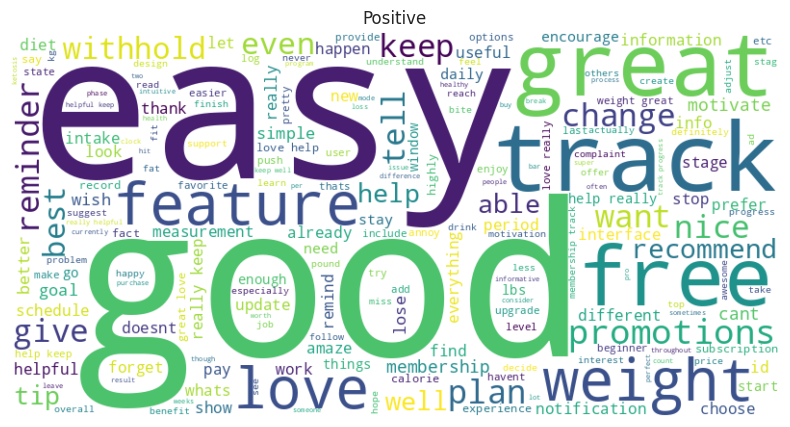

In [25]:
# @title Word Cloud (Positive)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')
plt.show()

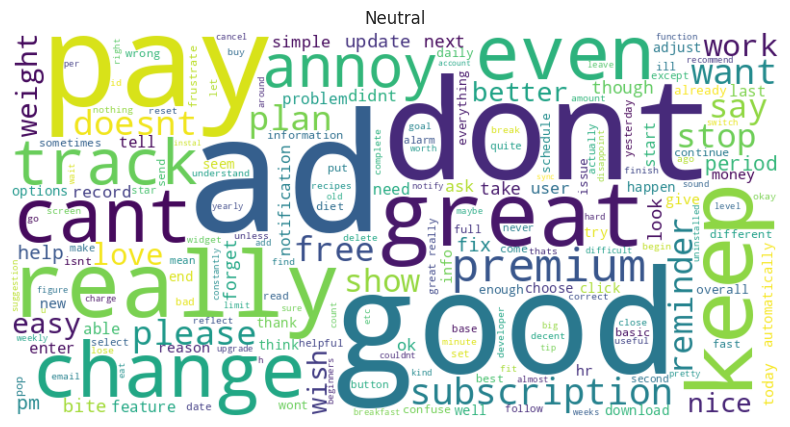

In [26]:
# @title Word Cloud (Neutral)

wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral')
plt.show()

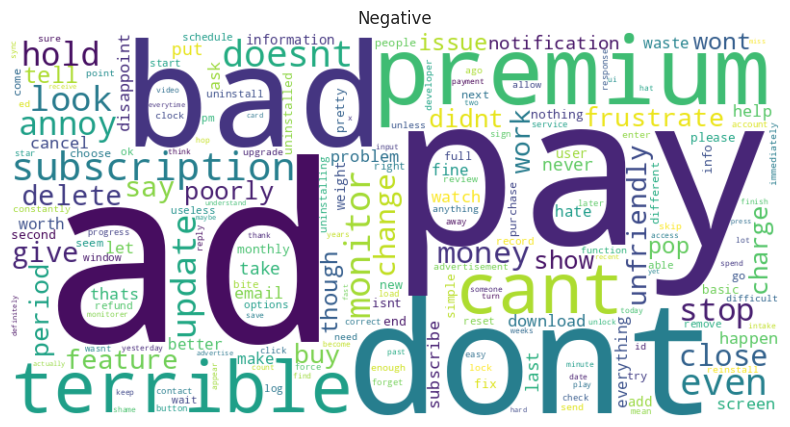

In [27]:
# @title Word Cloud (Negative)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()

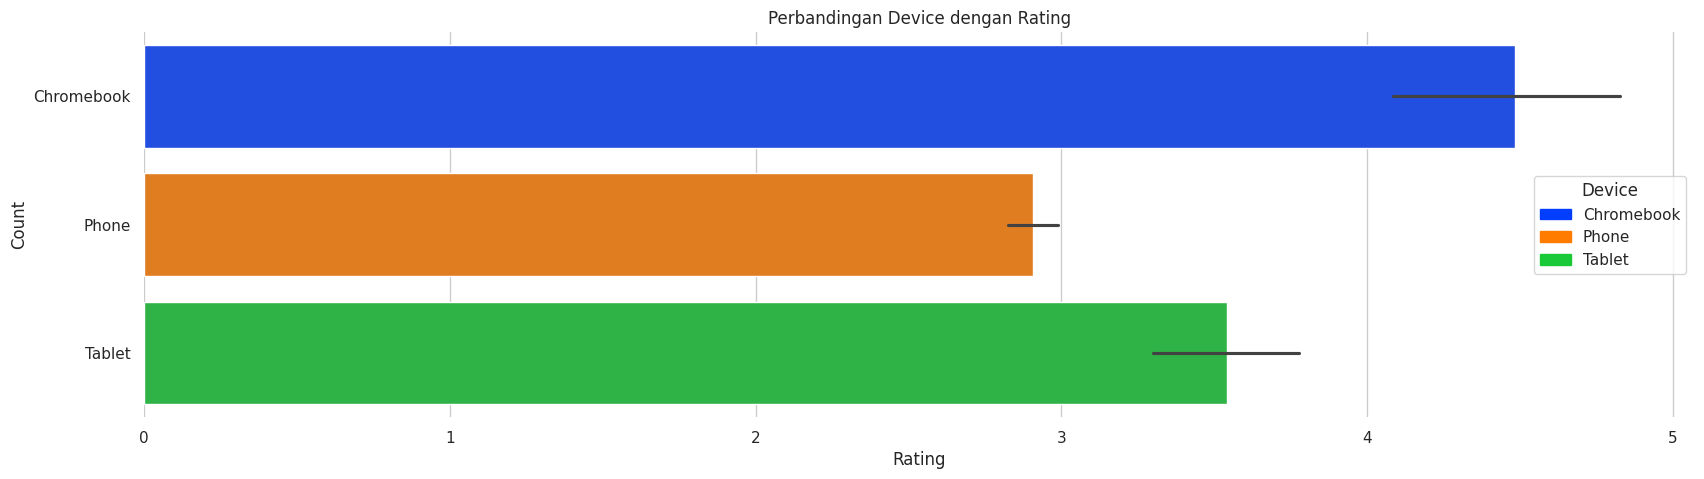

In [28]:
# @title Perbandingan antara Device dan Rating

# Membuat sebuah figur dengan ukuran yang telah ditentukan sebelumnya menggunakan plt.figure()
fig, ax = plt.subplots(figsize=(20, 5))

# Menggambar plot jenis bar
sns.barplot(data=dataset, x='Rating', y='Device', hue='Device', palette='bright', ax=ax)

# Menghapus batas atas, kanan, bawah, dan kiri dari sumbu plot
sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)

# Menambahkan judul plot
ax.set_title('Perbandingan Device dengan Rating')

# Menambahkan legenda dengan warna di pojok kanan atas
legend_handles = []
for device, color in zip(dataset['Device'].unique(), sns.color_palette('bright', n_colors=len(dataset['Device'].unique()))):
    legend_handles.append(mpatches.Patch(color=color, label=device))

# Menampilkan legenda dengan ukuran yang dapat diatur
ax.legend(handles=legend_handles, loc='center right', title='Device')
ax.set_xlabel('Rating')  # Tambahkan label sumbu x
ax.set_ylabel('Count')   # Tambahkan label sumbu y

# Menampilkan plot
plt.show()